<a href="https://colab.research.google.com/github/ArunavG16/LGMVIP-tasks/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LETS GROW MORE
#**DATA SCIENCE INTERNSHIP**

**BEGINNER LEVEL TASK**

TASK2 : STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

DATA SET: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

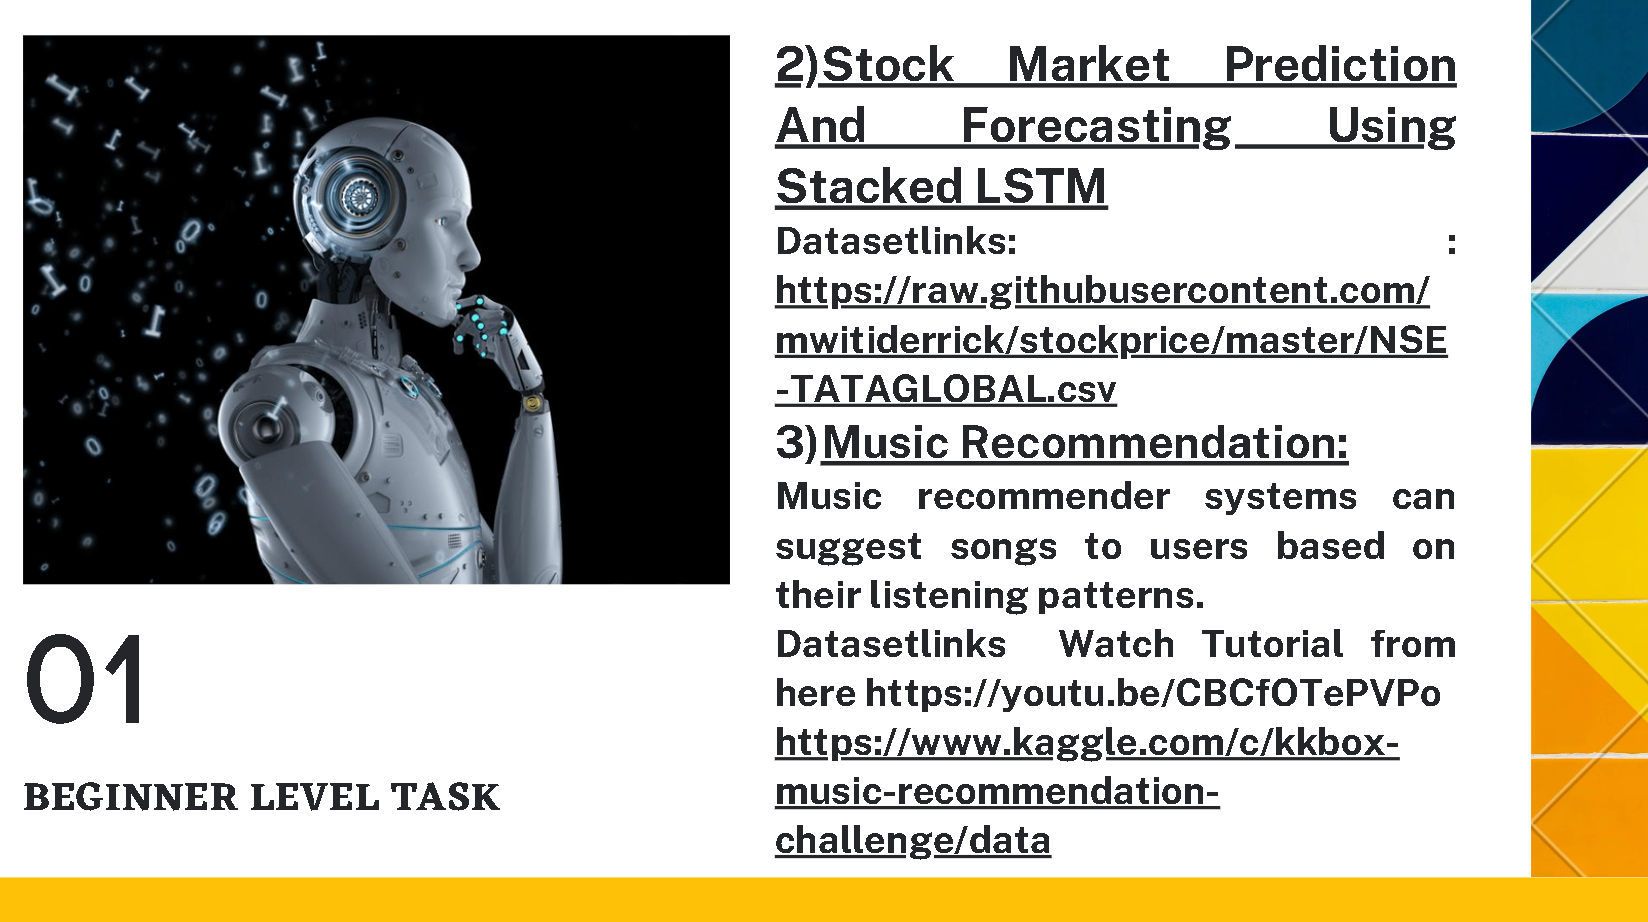

#INTRODUCTION TO DATASET 

The dataset is taken from AAPL company which I randomly found on the internet. In this model I used the Stacked LSTM(Long Short Term Memory). A Machine Learning Model for Stock Market Prediction. Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

LOADING DATASET

In [2]:
from google.colab import drive

In [4]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
data2 = pd.read_csv('/content/drive/MyDrive/data folder/stock.data')

In [6]:
data2.reset_index()
data2.head

<bound method NDFrame.head of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  

In [7]:
data2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
data2.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [9]:
data2.shape

(2035, 8)

In [10]:
data2.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
data2.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [14]:
data2.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [13]:
data2.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [15]:
data2.reset_index()['Close']
data2

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**Opening Price**

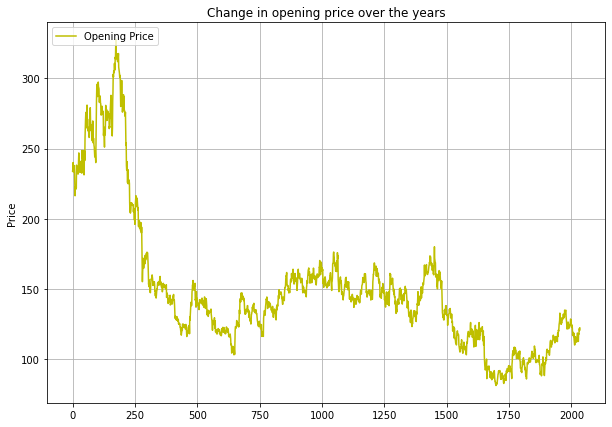

In [16]:
plt.figure(figsize=(8,6))
data2['Open'].plot(kind='line',figsize=(10,7),color='y',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

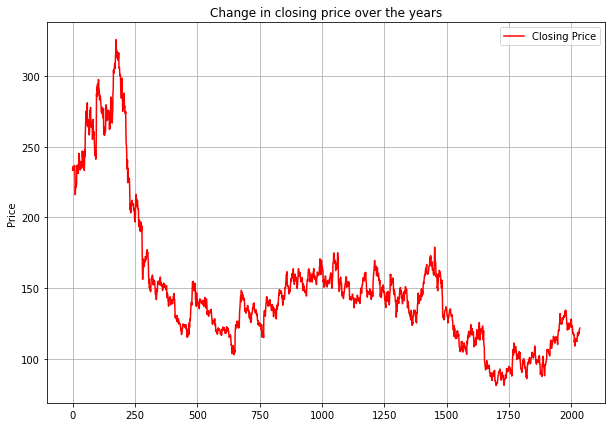

In [17]:
plt.figure(figsize=(8,6))
data2['Close'].plot(kind='line',figsize=(10,7),color='r',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

In [18]:
df=data2.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

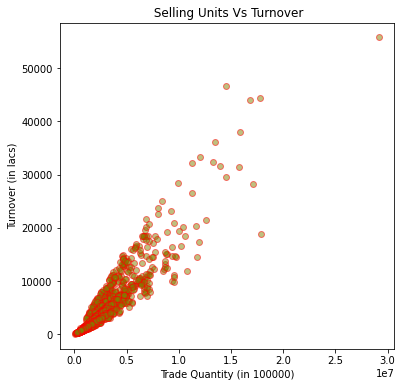

In [19]:
fig=plt.figure(figsize=(6,6))
plt.scatter(data2['Total Trade Quantity'],data2['Turnover (Lacs)'], alpha=0.5, edgecolor='r', color='olive')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()

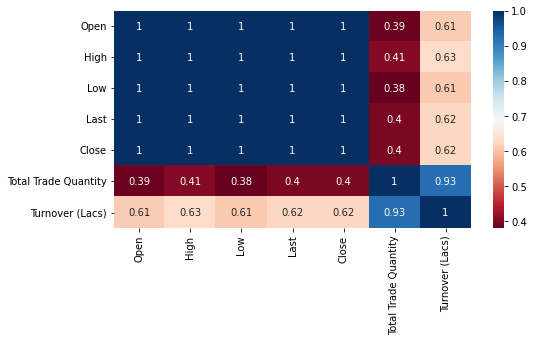

In [20]:
plt.figure(figsize=(8,4))
sns.heatmap(data2.corr(),annot=True,cmap='RdBu')

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

#Splitting data into training and test set

In [22]:
training_size = int(len(df)*0.60)
test_size = len(df) - training_size


train_data = df[0:training_size,:]
test_data = df[training_size:len(df), :1]
training_size, test_size

(1221, 814)

In [23]:
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [24]:
timesteps = 100
X_train, y_train = datasetCrtd(train_data, timesteps)
X_test, ytest = datasetCrtd(test_data, timesteps)

In [25]:
X_train.shape

(1120, 100)

In [26]:
X_test.shape

(713, 100)

In [27]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, validation_split=0.1, epochs=40, batch_size=64, verbose=1)

Epoch 1/40
16/16 [==============================] - 11s 265ms/step - loss: 0.0363 - val_loss: 0.0021
Epoch 2/40
16/16 [==============================] - 3s 183ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 3/40
16/16 [==============================] - 3s 179ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 4/40
16/16 [==============================] - 3s 178ms/step - loss: 0.0018 - val_loss: 9.0565e-04
Epoch 5/40
16/16 [==============================] - 3s 180ms/step - loss: 0.0016 - val_loss: 9.6962e-04
Epoch 6/40
16/16 [==============================] - 3s 184ms/step - loss: 0.0015 - val_loss: 9.0468e-04
Epoch 7/40
16/16 [==============================] - 3s 188ms/step - loss: 0.0014 - val_loss: 9.4529e-04
Epoch 8/40
16/16 [==============================] - 3s 179ms/step - loss: 0.0013 - val_loss: 8.0059e-04
Epoch 9/40
16/16 [==============================] - 3s 180ms/step - loss: 0.0013 - val_loss: 8.0911e-04
Epoch 10/40
16/16 [==============================] - 3s 182ms/step - loss: 

In [31]:
test_predict = model.predict(X_test)
test_predict1 = scaler.inverse_transform(test_predict)

23/23 [==============================] - 2s 37ms/step


In [32]:
test_predict1

array([[146.99966 ],
       [146.35188 ],
       [145.49524 ],
       [144.40501 ],
       [143.38362 ],
       [142.6456  ],
       [142.21867 ],
       [142.19125 ],
       [142.33533 ],
       [142.7352  ],
       [143.02159 ],
       [143.36412 ],
       [143.83597 ],
       [144.33238 ],
       [144.88602 ],
       [145.60828 ],
       [146.35818 ],
       [146.97285 ],
       [147.38687 ],
       [147.6836  ],
       [147.80875 ],
       [147.63033 ],
       [146.99695 ],
       [145.79065 ],
       [144.29517 ],
       [142.85223 ],
       [141.54958 ],
       [140.38025 ],
       [139.21216 ],
       [138.00551 ],
       [136.79387 ],
       [135.63579 ],
       [134.57951 ],
       [133.63306 ],
       [132.94125 ],
       [132.31734 ],
       [131.68707 ],
       [131.19926 ],
       [131.04517 ],
       [131.09576 ],
       [131.10468 ],
       [130.80835 ],
       [130.20662 ],
       [129.49657 ],
       [128.7434  ],
       [128.17955 ],
       [127.93963 ],
       [128.0

**I have completed my first task succesfully**

**Thanking to LetsGrowMore  and Special to Aman Kesarwani sir for this opportunity to improve and enhance my self in the field of DataScience**